## Optical flow: evaluation and plots

In [1]:
DATASET_PATH = '../../data_stereo_flow'

### Task 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from utils import OpticalFlow

#### Image 45

In [3]:
optical_flow = OpticalFlow(DATASET_PATH)

# Image 157
mask, u_gt, v_gt = optical_flow[45]
_, u, v = optical_flow.load_optical_flow('../../w1/LKflow_000045_10.png')

# Remove pixels without ground truth
u_gt, v_gt = u_gt[mask], v_gt[mask]
u, v = u[mask], v[mask]

MSE: 212.61157717277433
PEPN: 0.7856033739097096


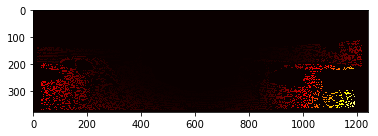

In [4]:
# MSE for non-occluded
err45 = (u - u_gt)**2 + (v - v_gt)**2

err_image = np.zeros(mask.shape)
err_image[mask] = err45
plt.imshow(err_image, cmap='hot')

print("MSE:", err45.mean())
print("PEPN:", np.sum(np.sqrt(err45) > 3) / err45.shape[0])

The plot above is great to see where we have larger errors. Overlaying the errors on the image can be a good way to see where we are doing okay, and where worse.

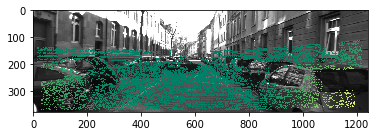

In [5]:
summer = plt.cm.get_cmap('summer') # good above grayscale image
err_image_overlapped = cv2.cvtColor(
    optical_flow.load_kitti_image(45),
    cv2.COLOR_GRAY2RGB)
err_image_overlapped[mask[:,:,np.newaxis].repeat(3, axis=-1)] = summer(err45/err45.max())[:, :-1].reshape(-1)*256
plt.imshow(err_image_overlapped)

#### Image 157

In [6]:
# Image 157
mask, u_gt, v_gt = optical_flow[157]
_, u, v = optical_flow.load_optical_flow('../../w1/LKflow_000157_10.png')

# Remove pixels without ground truth
u_gt, v_gt = u_gt[mask], v_gt[mask]
u, v = u[mask], v[mask]

MSE: 13.913098627817531
PEPN: 0.340475843692972


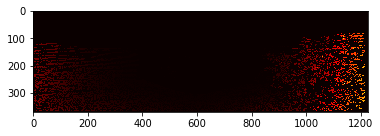

In [7]:
# MSE for non-occluded
err157 = (u - u_gt)**2 + (v - v_gt)**2

err_image = np.zeros(mask.shape)
err_image[mask] = err157
plt.imshow(err_image, cmap='hot')

print("MSE:", err157.mean())
print("PEPN:", np.sum(np.sqrt(err157) > 3) / err157.shape[0])

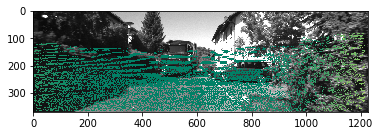

In [8]:
err_image_overlapped = cv2.cvtColor(
    optical_flow.load_kitti_image(157),
    cv2.COLOR_GRAY2RGB)
err_image_overlapped[mask[:,:,np.newaxis].repeat(3, axis=-1)] = summer(err157/err157.max())[:, :-1].reshape(-1)*256
plt.imshow(err_image_overlapped)

#### Histograms of errors

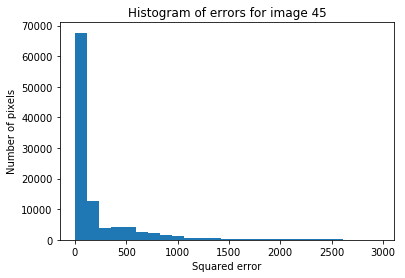

In [9]:
plt.hist(err45, bins=25)
plt.title("Histogram of errors for image 45")
plt.xlabel("Squared error")
plt.ylabel("Number of pixels")
plt.show()

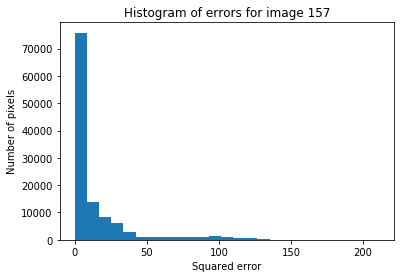

In [10]:
plt.hist(err157, bins=25)
plt.title("Histogram of errors for image 157")
plt.xlabel("Squared error")
plt.ylabel("Number of pixels")
plt.show()

#### Radially increasing error

We can kind of see that as we go further away from the center of the image, we see a larger error. We will confirm this by plotting the errors of every pixel with an optical flow ground truth against the distance from the image center.

In [11]:
# Compute the eucl. distance of every pixel from the center of the image
yy, xx = np.meshgrid(range(err_image.shape[1]), range(err_image.shape[0]))
x_dist = xx - (err_image.shape[0]-1)//2
y_dist = yy - (err_image.shape[1]-1)//2
radial_dist = x_dist**2 + y_dist**2

# Choose those pixels with a optical flow ground truth
hist = np.zeros(radial_dist.max())
hist[radial_dist[mask]] = err157

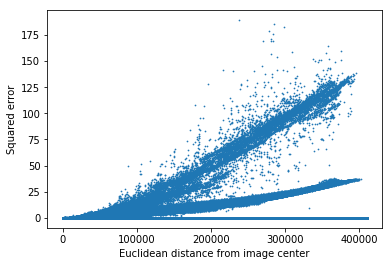

In [12]:
plt.scatter(range(len(hist)), hist, 0.5)
plt.xlabel("Euclidean distance from image center")
plt.ylabel("Squared error")
plt.show()

We can see that the error grows almost linearly as the distance from the origin grows. We see two *lines* as it appears that the error on the right side of the image grows higher than on the left side. Aditionally, we see a third line with almost no error.

We can plot the errors again to see and confirm this visually.

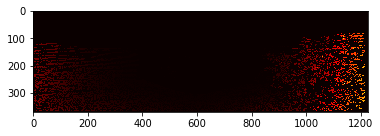

In [13]:
plt.imshow(err_image, cmap='hot')

Why is this happening? Because the image frames on KITTI are taken from a vehicle which is driving forward, so the pixels on the sides of the image are moving at higher speeds, and will also be more noisy because of this (motion blur, ...).

---

### Task 4

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import OpticalFlow, display_OpticalFlow

In [ ]:
optical_flow = OpticalFlow(DATASET_PATH)

#### Image 45

In [ ]:
# Image 45
mask, u_gt, v_gt = optical_flow[45]
_, u, v = optical_flow.load_optical_flow('../../w1/LKflow_000045_10.png')
img1 = optical_flow.load_kitti_image(45)

First we visualize the Ground Truth and the estimated Optical Flow using arrows over the first frame image:

In [ ]:
# Optical Flow as arrows
display_OpticalFlow(img1, u_gt, v_gt, 'arrows_seq045_gt.png', "arrows", divisor=3, plot=True)
display_OpticalFlow(img1, u, v, 'arrows_seq045.png', "arrows", divisor=3, plot=True)

Since this visualization is not very clear, we now try to substitude the vector field by a color wheel to represent each direction of the Optical Flow. Again, we first flow the Ground Truth and then the estimation:

In [ ]:
# Optical Flow as Color Wheel
display_OpticalFlow(img1, u_gt, v_gt, 'colorwheel_seq045_gt.png', "color_wheel", plot=True)
display_OpticalFlow(img1, u, v, 'colorwheel_seq045.png', "color_wheel", plot=True)

Finally, we have defined a simplify method to get a clearer visualization of the Optical Flow. Basecly, we devide the image into blocks and compute and display the average direction of the Optical Flow for each of these blocks. We use arrows to represent this (normalize) directions:

In [ ]:
# Optical Flow simplification (clean visualization)

# 4 X 14 blocks
display_OpticalFlow(img1, u_gt, v_gt, 'simplify_seq045_4_14_gt.png', "simplification", h_parts=14, v_parts=4, plot=True)
display_OpticalFlow(img1, u, v, 'simplify_seq045_4_14.png', "simplification", h_parts=14, v_parts=4, plot=True)

In [ ]:
# 8 X 28 blocks
display_OpticalFlow(img1, u_gt, v_gt, 'simplify_seq045_8_28_gt.png', "simplification", h_parts=28, v_parts=8, plot=True)
display_OpticalFlow(img1, u, v, 'simplify_seq045_8_28.png', "simplification", h_parts=28, v_parts=8, plot=True)

#### Image 157

Now we do the same for the other image:

In [ ]:
# Image 157
mask, u_gt, v_gt = optical_flow[157]
_, u, v = optical_flow.load_optical_flow('../../w1/LKflow_000157_10.png')
img1 = optical_flow.load_kitti_image(157)

In [ ]:
# Optical Flow as arrows
display_OpticalFlow(img1, u_gt, v_gt, 'arrows_seq157_gt.png', "arrows", divisor=3, plot=True)
display_OpticalFlow(img1, u, v, 'arrows_seq157.png', "arrows", divisor=3, plot=True)

In [ ]:
# Optical Flow as Color Wheel
display_OpticalFlow(img1, u_gt, v_gt, 'colorwheel_seq157_gt.png', "color_wheel", plot=True)
display_OpticalFlow(img1, u, v, 'colorwheel_seq157.png', "color_wheel", plot=True)

In [ ]:
# Optical Flow simplification (clean visualization)

# 4 X 14 blocks
display_OpticalFlow(img1, u_gt, v_gt, 'simplify_seq157_4_14_gt.png', "simplification", h_parts=14, v_parts=4, plot=True)
display_OpticalFlow(img1, u, v, 'simplify_seq157_4_14.png', "simplification", h_parts=14, v_parts=4, plot=True)

In [ ]:
# 8 X 28 blocks
display_OpticalFlow(img1, u_gt, v_gt, 'simplify_seq157_8_28_gt.png', "simplification", h_parts=28, v_parts=8, plot=True)
display_OpticalFlow(img1, u, v, 'simplify_seq157_8_28.png', "simplification", h_parts=28, v_parts=8, plot=True)